# Set Up

In [29]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [30]:
df = pd.read_csv("../Resources/winequality-red.csv", delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [31]:
# See the number of rows and columns
print("Rows, columns: " + str(df.shape))

# See the first five rows of the dataset
df.head()

Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Exploring Variables

In [33]:
fig = px.histogram(df,x='quality')
fig.show()

Based on the above we should bin quality scores into 2 bins

<AxesSubplot:>

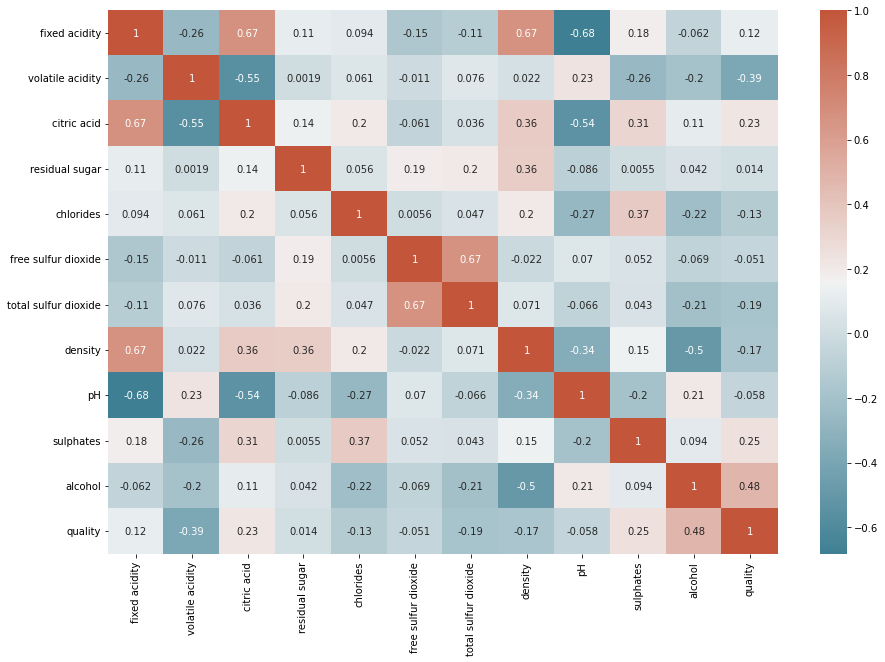

In [34]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

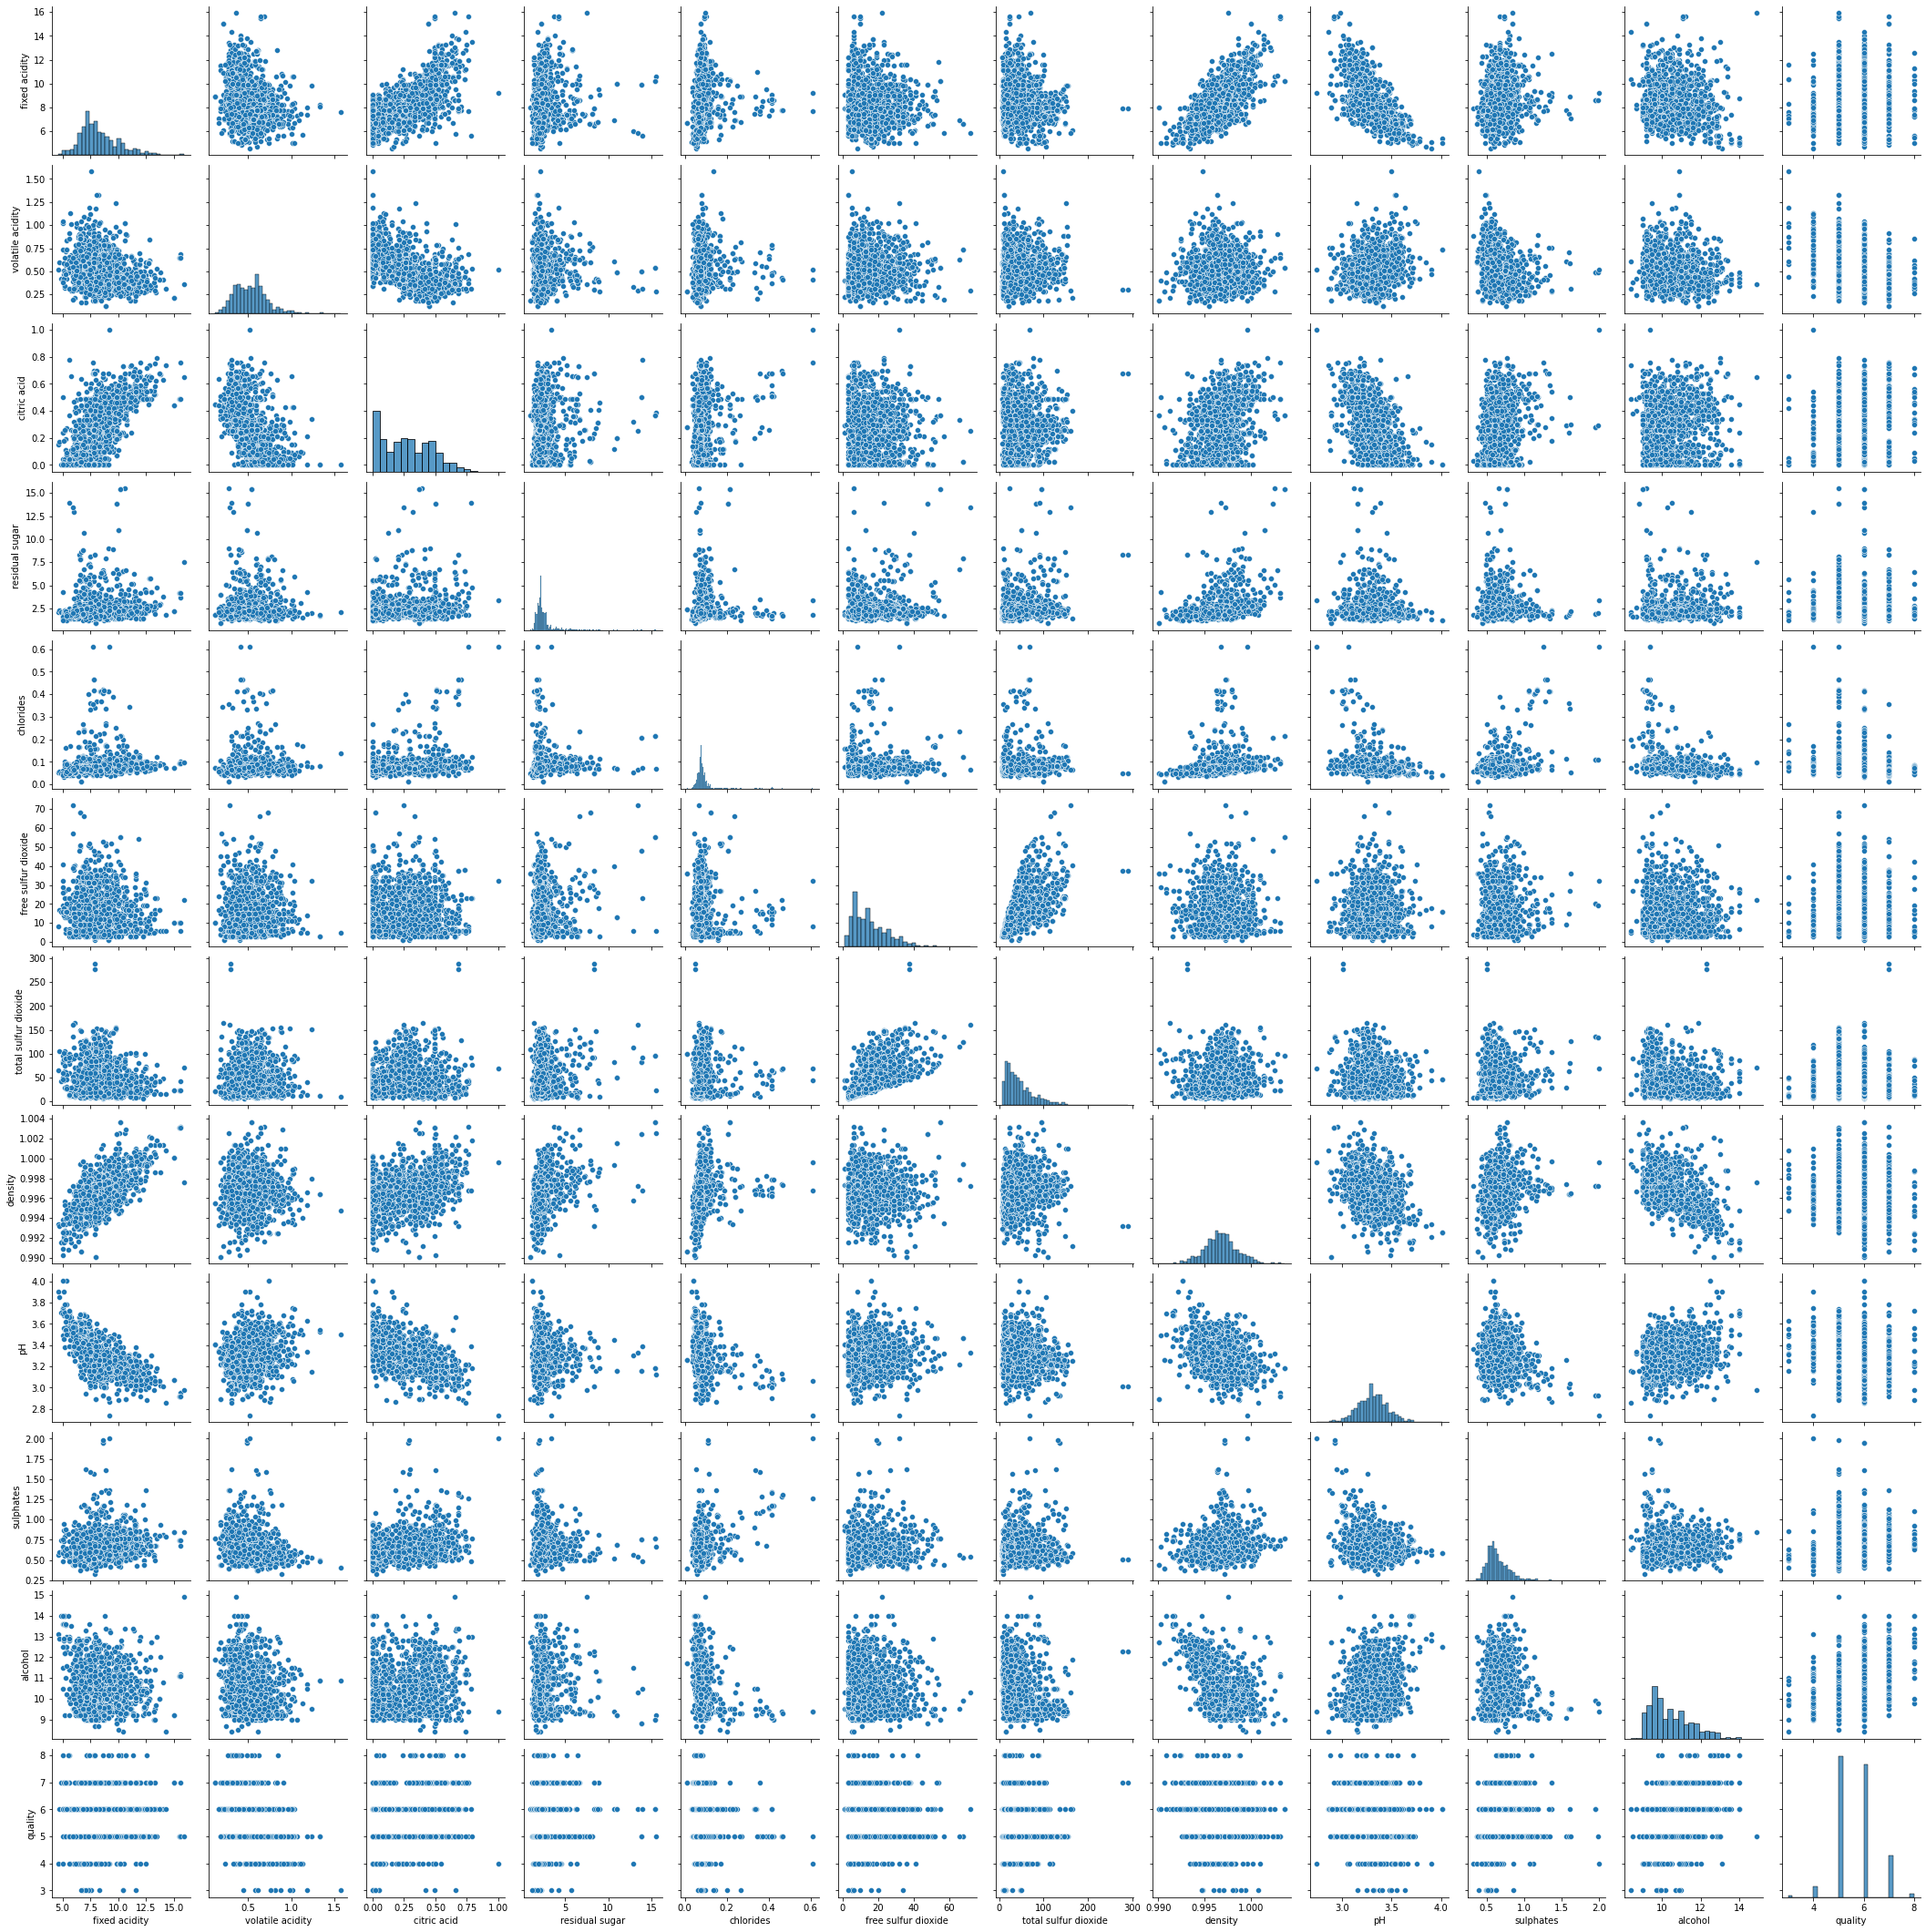

In [35]:
sns.pairplot(df)

In [36]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 6 else 0 for x in df['quality']]
df = df.drop(['quality'], axis = 1)
df['goodquality'].value_counts()

1    855
0    744
Name: goodquality, dtype: int64

<AxesSubplot:>

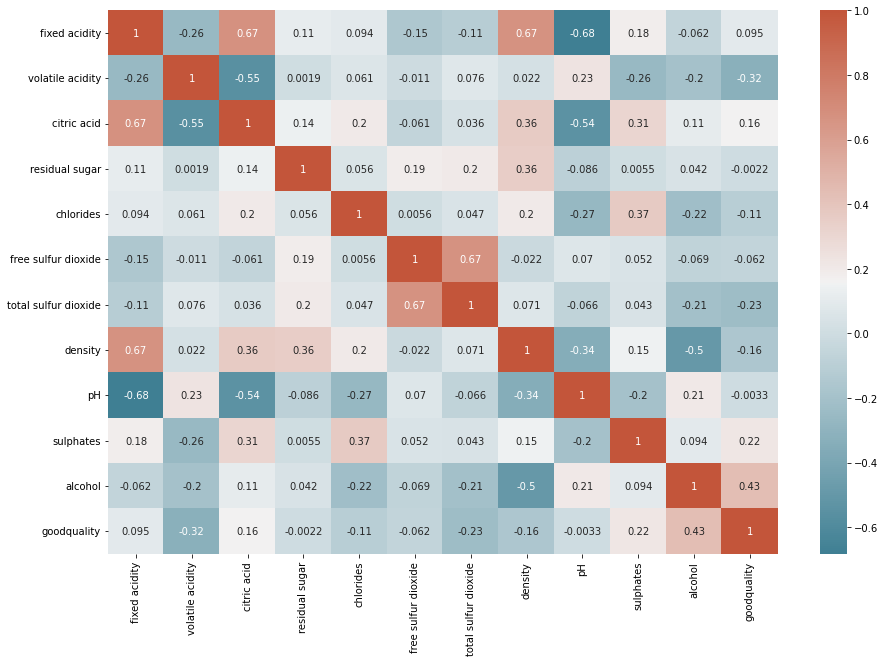

In [37]:
# Correlation Matrix
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Check for outliers doing box and whisker plots

<AxesSubplot:>

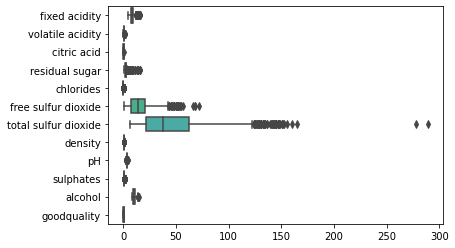

In [38]:
sns.boxplot(data=df, orient='h')

Based on the plot there are outliers in the two sulfur oxide categories and one or so in the residual sugar

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  goodquality           1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [40]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

clean_df = remove_outlier(df, 'free sulfur dioxide')
clean_df = remove_outlier(clean_df, 'total sulfur dioxide')
clean_df = remove_outlier(clean_df, 'residual sugar')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1375 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1375 non-null   float64
 1   volatile acidity      1375 non-null   float64
 2   citric acid           1375 non-null   float64
 3   residual sugar        1375 non-null   float64
 4   chlorides             1375 non-null   float64
 5   free sulfur dioxide   1375 non-null   float64
 6   total sulfur dioxide  1375 non-null   float64
 7   density               1375 non-null   float64
 8   pH                    1375 non-null   float64
 9   sulphates             1375 non-null   float64
 10  alcohol               1375 non-null   float64
 11  goodquality           1375 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 139.6 KB


In [41]:
# Separate feature variables and target variable
X = clean_df.drop(['goodquality'], axis = 1)
y = clean_df['goodquality']

In [42]:
# See proportion of good vs bad wines
clean_df['goodquality'].value_counts()

1    762
0    613
Name: goodquality, dtype: int64

Not as balanced as I'd like.... but better than initial groupings.

In [43]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [44]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

# Modeling

## Decision Tree

In [45]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       151
           1       0.77      0.80      0.78       193

    accuracy                           0.75       344
   macro avg       0.75      0.74      0.74       344
weighted avg       0.75      0.75      0.75       344



## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet

model6 = LogisticRegression(solver='liblinear', random_state=1).fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       151
           1       0.74      0.73      0.73       193

    accuracy                           0.70       344
   macro avg       0.70      0.70      0.70       344
weighted avg       0.70      0.70      0.70       344



## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.80      0.86      0.83       193

    accuracy                           0.80       344
   macro avg       0.80      0.79      0.79       344
weighted avg       0.80      0.80      0.80       344



Note: default estimators is 100

In [48]:
from sklearn.ensemble import RandomForestClassifier
model2_2 = RandomForestClassifier(n_estimators=1000, random_state=1)
model2_2.fit(X_train, y_train)
y_pred2_2 = model2_2.predict(X_test)
print(classification_report(y_test, y_pred2_2))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       151
           1       0.79      0.85      0.82       193

    accuracy                           0.79       344
   macro avg       0.79      0.79      0.79       344
weighted avg       0.79      0.79      0.79       344



## ADA Boost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       151
           1       0.74      0.77      0.75       193

    accuracy                           0.72       344
   macro avg       0.71      0.71      0.71       344
weighted avg       0.72      0.72      0.72       344



## Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       151
           1       0.78      0.80      0.79       193

    accuracy                           0.76       344
   macro avg       0.76      0.75      0.75       344
weighted avg       0.76      0.76      0.76       344



## XGBoost

In [51]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1,use_label_encoder=False)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

[02:35:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       151
           1       0.79      0.82      0.81       193

    accuracy                           0.78       344
   macro avg       0.78      0.77      0.77       344
weighted avg       0.78      0.78      0.78       344



## Extra Tree Classifier

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
model6 = ExtraTreesClassifier(random_state=1)
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       151
           1       0.78      0.84      0.81       193

    accuracy                           0.78       344
   macro avg       0.78      0.77      0.78       344
weighted avg       0.78      0.78      0.78       344



In [53]:
from sklearn.ensemble import ExtraTreesClassifier
model6_6 = ExtraTreesClassifier(n_estimators = 1000,random_state=1)
model6_6.fit(X_train, y_train)
y_pred6_6 = model6_6.predict(X_test)
print(classification_report(y_test, y_pred6_6))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       151
           1       0.79      0.87      0.82       193

    accuracy                           0.79       344
   macro avg       0.80      0.78      0.79       344
weighted avg       0.79      0.79      0.79       344



In [54]:
from sklearn.ensemble import ExtraTreesClassifier
model6_6_1 = ExtraTreesClassifier(bootstrap=True,random_state=1)
model6_6_1.fit(X_train, y_train)
y_pred6_6_1 = model6_6_1.predict(X_test)
print(classification_report(y_test, y_pred6_6_1))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.79      0.86      0.83       193

    accuracy                           0.80       344
   macro avg       0.80      0.79      0.79       344
weighted avg       0.80      0.80      0.79       344



Our winning model!

NOTE: Varified bootstrapping and max features did not lead to significant improvements on any other models - nor changing estimators to higher than default of 100 other than for random forest and extra trees

Feature Importance

Random Forest

<AxesSubplot:>

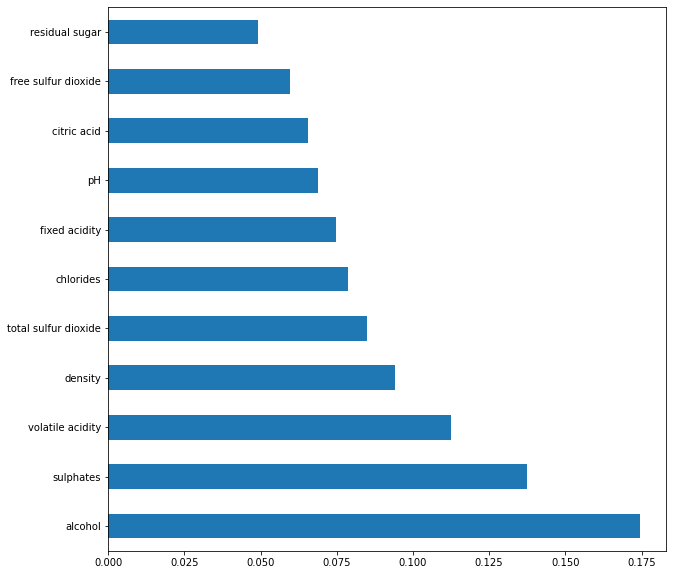

In [55]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

XGBoost

<AxesSubplot:>

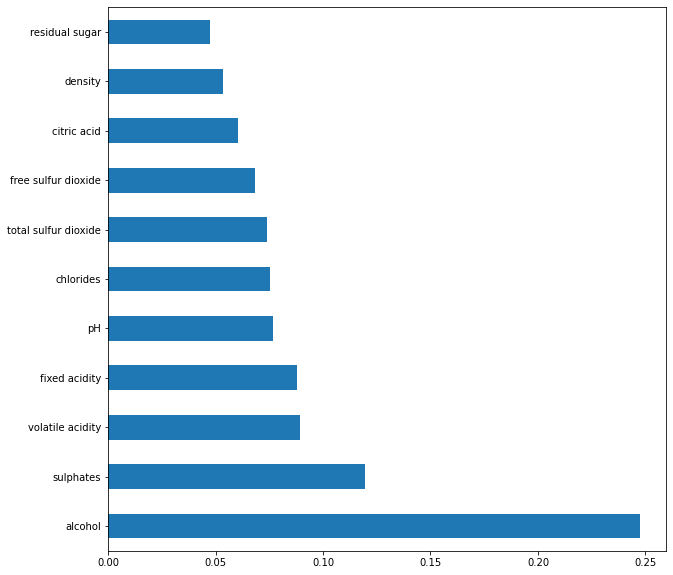

In [56]:
feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

Comparing Top 4 Features

In [57]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()

# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
count,744.000000,744.000000,744.000000,744.00000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.0
mean,8.142204,0.589503,0.237755,2.54207,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,0.0
std,1.572396,0.177956,0.183368,1.39355,0.055781,10.890291,36.720468,0.001598,0.154296,0.176194,0.758007,0.0
min,4.600000,0.180000,0.000000,1.20000,0.039000,3.000000,6.000000,0.992560,2.740000,0.330000,8.400000,0.0
25%,7.100000,0.460000,0.080000,1.90000,0.074000,8.000000,23.750000,0.996120,3.200000,0.520000,9.400000,0.0
50%,7.800000,0.590000,0.220000,2.20000,0.081000,14.000000,45.000000,0.996935,3.310000,0.580000,9.700000,0.0
75%,8.900000,0.680000,0.360000,2.60000,0.094000,23.000000,78.000000,0.997900,3.400000,0.650000,10.300000,0.0
max,15.900000,1.580000,1.000000,15.50000,0.611000,68.000000,155.000000,1.003150,3.900000,2.000000,14.900000,0.0
